In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)
ride_city=pd.merge(ride,city, on="city")


In [18]:
ride_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

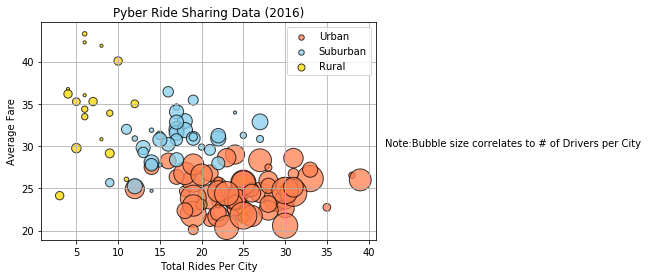

In [36]:
urban=ride_city[ride_city['type']=='Urban'].groupby(['city']).count()['ride_id']
Suburban=ride_city[ride_city['type']=='Suburban'].groupby(['city']).count()['ride_id']
Rural=ride_city[ride_city['type']=='Rural'].groupby(['city']).count()['ride_id']

URfare=ride_city[ride_city['type']=='Urban'].groupby(['city']).mean()['fare']
SUBfare=ride_city[ride_city['type']=='Suburban'].groupby(['city']).mean()['fare']
Rufare=ride_city[ride_city['type']=='Rural'].groupby(['city']).mean()['fare']

UR=ride_city[ride_city['type']=='Urban'].groupby(['city']).mean()['driver_count']
SUB=ride_city[ride_city['type']=='Suburban'].groupby(['city']).mean()['driver_count']
Ru=ride_city[ride_city['type']=='Rural'].groupby(['city']).mean()['driver_count']

plt.scatter(urban, URfare, marker="o", facecolors="coral", edgecolors="black",s=UR*10, alpha=0.75, label='Urban')
plt.scatter(Suburban, SUBfare,marker="o", facecolors="skyblue", edgecolors="black",s=SUB*10, alpha=0.75, label='Suburban')
plt.scatter(Rural, Rufare, marker="o", facecolors="gold", edgecolors="black",s=Ru*10, alpha=0.75, label='Rural')

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides Per City")
plt.ylabel("Average Fare")

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.grid()

plt.text(42,30,"Note:Bubble size correlates to # of Drivers per City")

plt.savefig("../Images/pyber_2016.png")

## Total Fares by City Type

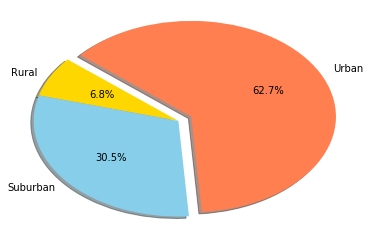

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [42]:

totalu=ride_city.groupby('type').sum()['fare']

labels=['Rural','Suburban','Urban']
colors=['gold','skyblue','coral']
explode=[0,0,0.1]

plt.pie(totalu, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('auto')
plt.savefig("../Images/fares_city.png")
plt.show()
totalu

## Total Rides by City Type

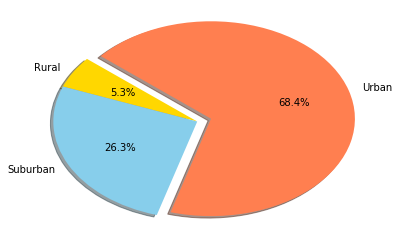

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [43]:

totalR=ride_city.groupby('type').count()['ride_id']
labels=['Rural','Suburban','Urban']
colors=['gold','skyblue','coral']
explode=[0,0,0.1]

plt.pie(totalR, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('auto')
plt.show()
totalR

## Total Drivers by City Type

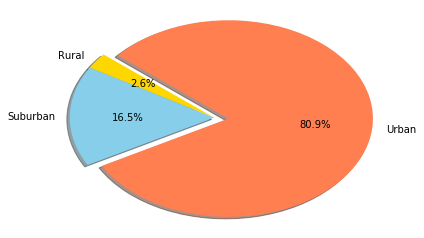

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [44]:

totalD=city.groupby(['type']).sum()['driver_count']
labels=['Rural','Suburban','Urban']
colors=['gold','skyblue','coral']
explode=[0,0,0.1]

plt.pie(totalD,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('auto')
plt.show()
totalD
